# Human Mood or Emotion Detection from Images using Python

## Introduction

In recent years, there has been a growing interest in developing technologies capable of understanding and interpreting human emotions from images. The ability to detect human mood from visual cues opens up a wide range of applications, from improving user experiences in human-computer interaction to enhancing mental health diagnostics. In this Jupyter Notebook, we explore the exciting field of human mood or emotion detection from images using Python.

## Python Packages for Emotion Detection

### TensorFlow and Keras

[TensorFlow](https://www.tensorflow.org/) and its high-level API [Keras](https://keras.io/) provide a powerful platform for building and training deep learning models. These frameworks offer pre-trained models suitable for image classification tasks, making them a popular choice for emotion detection.

### OpenCV

[OpenCV (Open Source Computer Vision)](https://opencv.org/) is a versatile computer vision library that plays a crucial role in image processing tasks. Its wide array of functions can be used for facial detection and preprocessing images before feeding them into emotion recognition models.

## Emotion Detection Libraries

### FER (Facial Expression Recognition)

The [FER library](https://github.com/priya-dwivedi/face_and_emotion_detection/tree/master/emotion_detector_models) is a dedicated library specifically designed for facial expression recognition. It provides pre-trained models capable of detecting emotions such as happiness, sadness, anger, and more. We will be using the FER library to streamline the process of emotion detection in this notebook.

## Getting Started

To begin our exploration, we'll use a simple yet effective approach employing pre-trained models. Specifically, we'll leverage the capabilities of the FER library to detect and recognize facial expressions from images.
 ### Import FER and opencv-python packages

In [65]:
from fer import FER #version 22.5.1
import cv2 ##version 4.8.1
import matplotlib.pyplot as plt ##3.7.2

Packages version used in this notebook (optional)

The line `emotion_detector = FER(mtcnn=True)` is initializing an instance of the `FER` (Facial Expression Recognition) class from the FER library with a specific configuration parameter.

Here's a breakdown of the line:

- `FER`: This is the main class of the FER library, representing the facial expression recognition model. Instances of this class are used to perform facial expression detection on images.

- `mtcnn=True`: This part of the code specifies a parameter `mtcnn` and sets it to `True`. The `mtcnn` parameter stands for Multi-Task Cascaded Convolutional Networks, which is a specific algorithm used for face detection and alignment. When `mtcnn` is set to `True`, it indicates that the FER instance should use the MTCNN algorithm as part of the facial expression detection process.

In simpler terms, by setting `mtcnn=True`, the `emotion_detector` instance will utilize the MTCNN algorithm for face detection and alignment before performing facial expression recognition. MTCNN is known for its accuracy in detecting facial features, making it a valuable tool in the context of facial expression recognition where precise facial alignment is crucial.


In [66]:
emotion_detector = FER(mtcnn=True)

Read the image using `cv2 (opencv-python)`

In [67]:
img = cv2.imread("4.jpg")

Analyze emotions using the `FER` library

In [68]:
analysis = emotion_detector.detect_emotions(img)
analysis

[{'box': [75, 39, 53, 74],
  'emotions': {'angry': 0.0,
   'disgust': 0.0,
   'fear': 0.07,
   'happy': 0.0,
   'sad': 0.0,
   'surprise': 0.93,
   'neutral': 0.0}}]

In [69]:
emotions_dictionary = analysis[0]['emotions'] #get the emotions key-value pair
emotions_dictionary

{'angry': 0.0,
 'disgust': 0.0,
 'fear': 0.07,
 'happy': 0.0,
 'sad': 0.0,
 'surprise': 0.93,
 'neutral': 0.0}

In [70]:
emotion_labels  = list(emotions_dictionary.keys())

#emotion_values = emotions_dictionary.values() OR

emotion_values = [emotions_dictionary[i] for i in emotion_labels]


Determine the dominant emotion

In [71]:
max_value = max(emotion_values)
for key, value in emotions_dictionary.items():
    if value == max_value:
        dominant_emotion = key.title() #make the first letter capital

In [72]:
dominant_emotion

'Surprise'

Plot a bar graph and anotate the dominant emotion using `matplotlib`

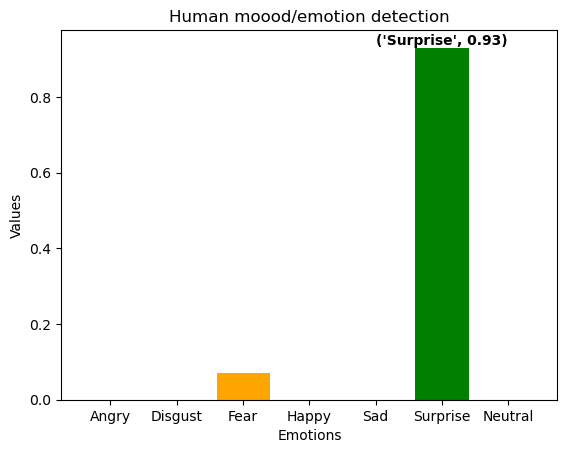

In [73]:
# Define colors for each label
colors = ['blue', 'green', 'orange', 'red']

emotion_labels  = [i.title() for i in emotions_dictionary.keys()]
# Plotting the bar graph
plt.bar(emotion_labels, emotion_values, color=colors)

# Annotate the dominant emotion
index_to_annotate = emotion_labels.index(dominant_emotion)  # Index of the emotion_label to annotate
value_to_annotate = emotion_values[index_to_annotate]

# Add the annotation
plt.annotate(f'{dominant_emotion,value_to_annotate}', 
             xy=(index_to_annotate, value_to_annotate),
             xytext=(index_to_annotate, value_to_annotate),  # Adjust the text position
             ha='center',  # Horizontal alignment
             va='bottom',  # Vertical alignment
             color='black',  # Text color
             weight='bold')  # Text weight



# Adding labels and title
plt.xlabel('Emotions')
plt.ylabel('Values')
plt.title('Human moood/emotion detection')

# Display the plot
plt.show()